In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
monthly = "housing_in_london_monthly_variables.csv"
yearly = "housing_in_london_yearly_variables.csv"

In [7]:
monthly_df = pd.read_csv(monthly, encoding="utf-8")
monthly_df

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [9]:
#Drop rows with na values for data analysis
monthly_df = monthly_df.dropna()
monthly_df

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
72,2001-01-01,city of london,284262,E09000001,24.0,0.0,1
73,2001-02-01,city of london,198137,E09000001,37.0,0.0,1
74,2001-03-01,city of london,189033,E09000001,44.0,0.0,1
75,2001-04-01,city of london,205494,E09000001,38.0,0.0,1
76,2001-05-01,city of london,223459,E09000001,30.0,0.0,1
...,...,...,...,...,...,...,...
9931,2019-07-01,westminster,957897,E09000033,168.0,6991.0,1
9932,2019-08-01,westminster,914870,E09000033,156.0,7069.0,1
9933,2019-09-01,westminster,925955,E09000033,169.0,6384.0,1
9934,2019-10-01,westminster,927864,E09000033,168.0,7208.0,1


In [13]:
#No crime data until year 2001
# monthly_df["date"].unique()

In [14]:
#Equal rows for every area except city of london without na values
# monthly_df["area"].value_counts()

In [93]:
#Create a new data frame that shows average house prices for each area.
average_housing_by_area = monthly_df.groupby(["area"]).mean()["average_price"]
average_price_df = pd.DataFrame(average_housing_by_area)
average_price_df = average_price_df.sort_values(by=['average_price'])
average_price_df["average_price"] = average_price_df["average_price"]

In [94]:
average_price_df.dtypes


average_price    float64
dtype: object

In [96]:
average_price_df['area'] = average_price_df.index

In [124]:
average_price_df = average_price_df.reset_index(drop=True)
average_price_df = average_price_df.round(2)

In [125]:
average_price_df_bottom_5 = average_price_df.head()
average_price_df_bottom_5

,average_price,area
0,190135.95,barking and dagenham
1,223515.96,bexley
2,234716.45,newham
3,242141.19,havering
4,246834.46,croydon


In [126]:
average_price_df_top_5 = average_price_df.tail()
average_price_df_top_5

,average_price,area
28,451974.00,richmond upon thames
29,527594.00,hammersmith and fulham
30,559213.34,camden
31,654077.12,westminster
32,888639.07,kensington and chelsea


<IPython.core.display.Javascript object>


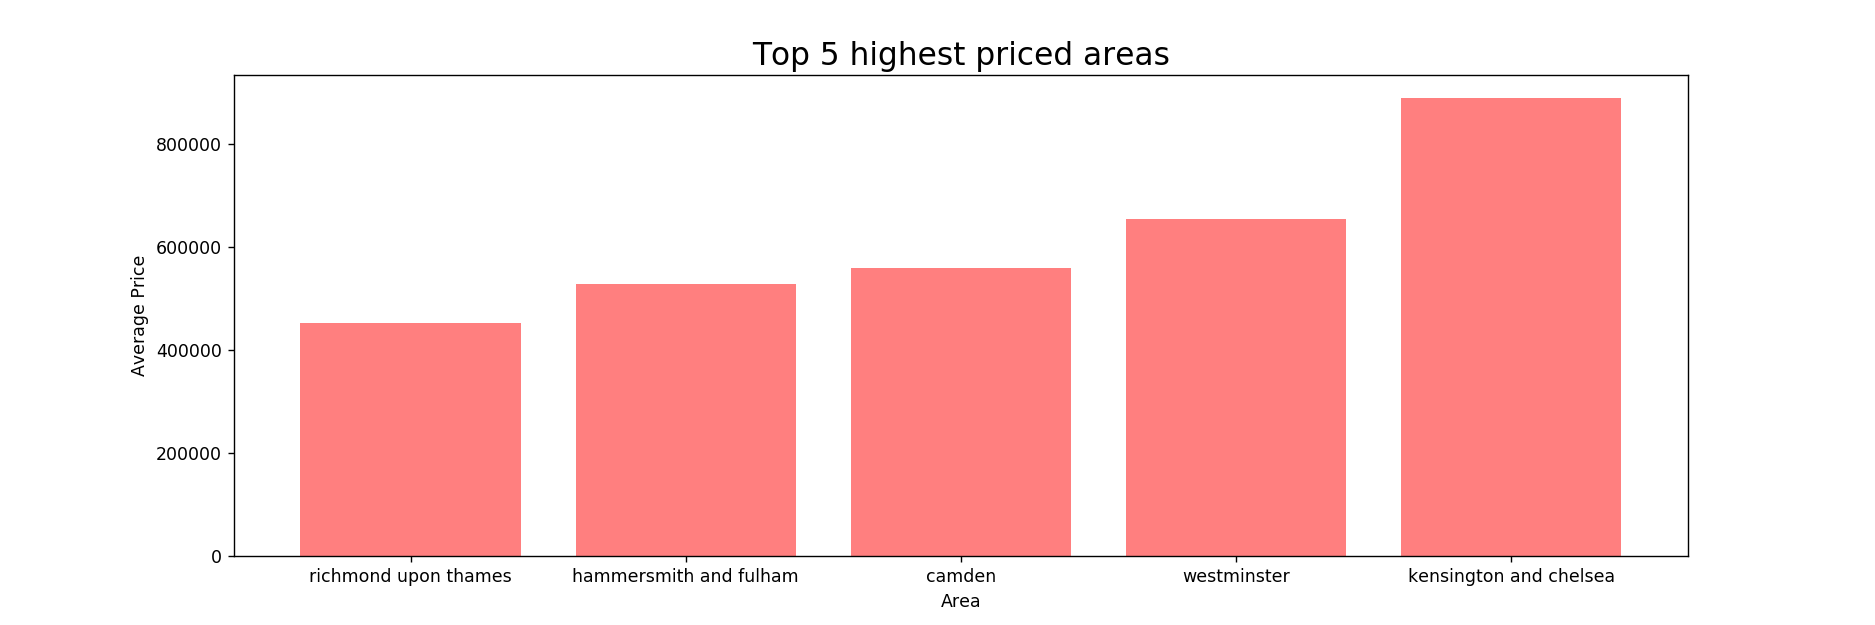

Text(0.5, 1.0, 'Top 5 highest priced areas')

In [133]:
x_axis_top5 = average_price_df_top_5['area']
y_axis_top5 = average_price_df_top_5["average_price"]
plt.figure(figsize=(15,5))
plt.bar(x_axis_top5, y_axis_top5, color='r', alpha=0.5)
plt.xlabel('Area', fontsize=10)
plt.ylabel('Average Price', fontsize=10)
plt.title("Top 5 highest priced areas", fontsize=18)

<IPython.core.display.Javascript object>


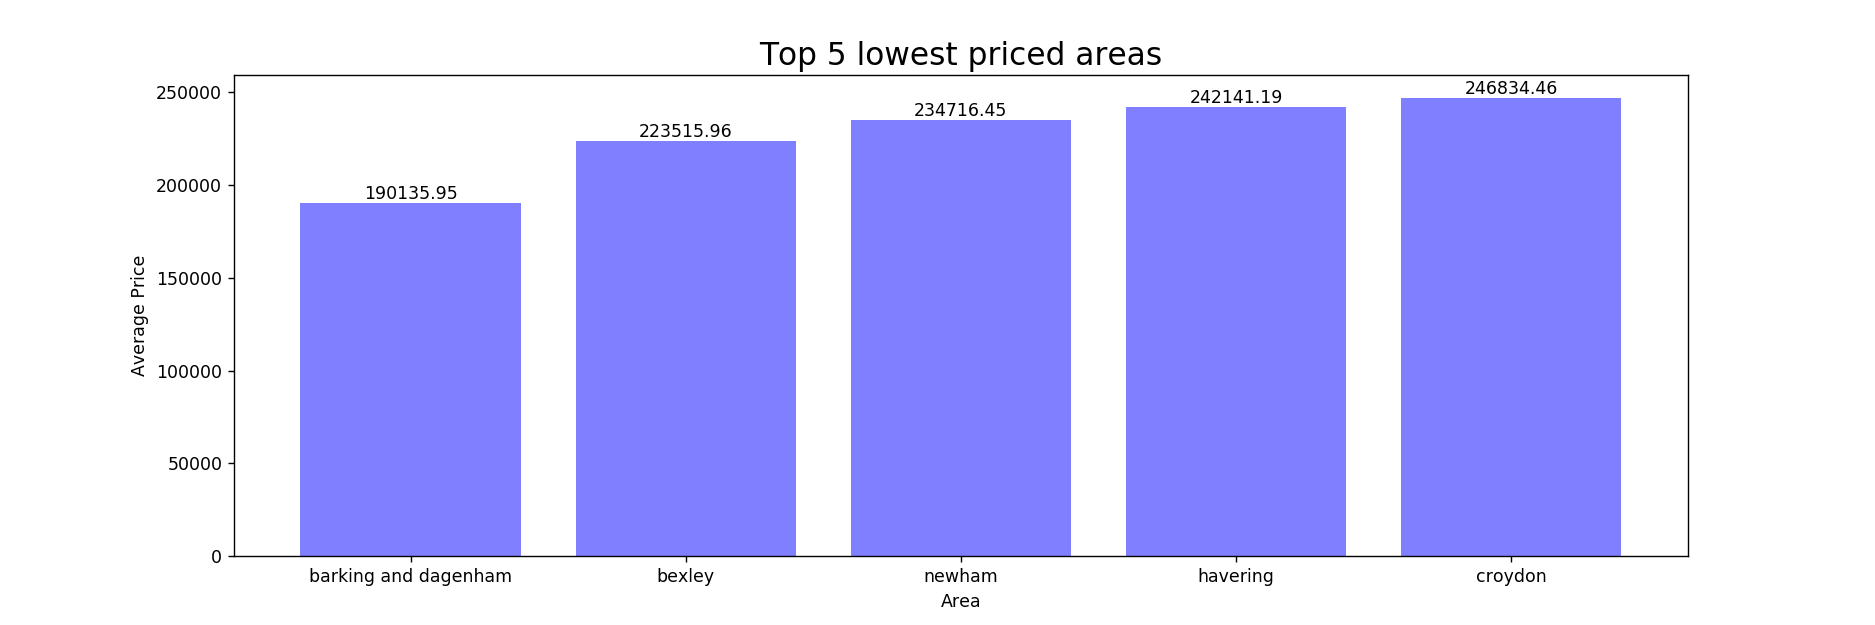

In [128]:
x_axis_bottom5 = average_price_df_bottom_5['area']
y_axis_bottom5 = average_price_df_bottom_5["average_price"]

plt.figure(figsize=(15,5))
plt.bar(x_axis_bottom5, y_axis_bottom5, color='b', alpha=0.5)
plt.xlabel('Area', fontsize=10)
plt.ylabel('Average Price', fontsize=10)
plt.title("Top 5 lowest priced areas", fontsize=18)

for i in range(len(y_axis_bottom5)):
    plt.annotate(str(y_axis_bottom5[i]), xy=(x_axis_bottom5[i],y_axis_bottom5[i]), ha='center', va='bottom')
plt.show()

In [4]:
#Yearly data
yearly_df = pd.read_csv(yearly, encoding="utf-8")
yearly_df.head(10)

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1
5,E09000006,bromley,1999-12-01,16720.0,NaN,21293,13,294902.0,NaN,NaN,NaN,1
6,E09000007,camden,1999-12-01,23677.0,NaN,30249,13,190003.0,NaN,NaN,NaN,1
7,E09000008,croydon,1999-12-01,19563.0,NaN,22205,13,332066.0,NaN,NaN,NaN,1
8,E09000009,ealing,1999-12-01,20580.0,NaN,25046,12,302252.0,NaN,NaN,NaN,1
9,E09000010,enfield,1999-12-01,19289.0,NaN,21006,9,272731.0,NaN,NaN,NaN,1
